### An Object-Oriented Perspective on Input / Output in Python

Saving and reading data to files in python is part of its core functionality. In introductory python courses file I/O (reading and writing) is typically taught as a distinct topic. Databases, and accessing network and web resources through APIs for example, are also taught as distinct topics. However, when we look at these from an object-oriented programming perspective, more similarities become apparent. We see that the programming creates file objects, database objects, and web resource objects. These objects are known more generally as context managers. context managers do not contain the contents of the files or databases or websites. Rather, they create or open a stable connection to the resource, manage our interaction with it, and close it when we are finished. This is the perspective we will take this week and throughout this course. 

To illustrate this, lets first look at opening, reading, writing, and appending a file without a context manager.

In [ ]:
# read a file
file = open('week04ex01.txt', 'r')
try:
    data = file.read()
    print(data)
finally:
    file.close()


In [ ]:
# write a file
file = open('week04ex02.txt', 'w')
try:
    file.write(data)
    file.write("\nThis file is written without a context manager.\n")
finally:
    file.close()

In [ ]:
# append a file
file = open('week04ex02.txt', 'a')
try:
    file.write("Appending a new line to the file.\n")
finally:
    file.close()

In [ ]:
# now open with a context manager
with open('week04ex02.txt', 'r') as file:
    data = file.read()
    print(data)
# File is automatically closed here

#### File Types
Common data file types include .txt, .csv, .json, and .xml. There are modules for working with different data types (these and others). Images are stored and read as binary files. Use a rendering module like pillow to display the image on the screen.

#### read and display an image file

In [ ]:
# Open the image file in binary mode and print the first 100 bytes
with open('IMG_20240913_141204_482.jpg', 'rb') as file:
    binary_data = file.read()
    # Print the first 100 bytes of the binary data
    print(binary_data[:100])


In [ ]:
from PIL import Image
# Open and display the image using Pillow
image = Image.open('IMG_20240913_141204_482.jpg')
image.show()

#### Why Use Context Managers?
    Automatic resource management
    Ensuring files are properly closed even in the case of errors  

#### Benefits
    Cleaner code
    Reduced risk of resource leaks

In [ ]:
with open('week04ex02.txt', 'r') as file:
    print(dir(file))

the 'dir' keyword shows the variables and methods that are part of the 'file' object. The 'file' object was created using the 'with' and 'as' keywords. The 'file' object is the actual context manager. It does not contain the contents of the file we want to work with. Rather, it manages the file connection and how we interact with the file.

Two important methods in our context manager are '__enter__' and '__exit__'. These methods handle the opening and closing of the file. We could use these to create a custom file manager class if we wanted:

In [ ]:
class FileManager:
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode
        self.file = None
    
    def __enter__(self):
        self.file = open(self.filename, self.mode)
        return self.file
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        if self.file:
            self.file.close()

with FileManager('week04ex03.txt', 'w') as f:
    f.write('Our custom file manager is cool')


In [ ]:
with FileManager('week04ex03.txt', 'r') as f:
    data = f.read()
    print(data)

There are libraries (modules) available for building custom context managers if you need to. For example:

In [ ]:
from contextlib import contextmanager

@contextmanager   # this is a decorator
def open_file(file, mode):
    f = open(file, mode)
    try:
        yield f 
    finally:
        f.close()

with open_file('week04ex03.txt', 'a') as f:
    f.write('now using contextlib!')


In [ ]:
with open_file('week04ex03.txt', 'r') as f:
    data = f.read()
    print(data)

In the code above you should notice two things: '@contextmanager' is what we call a decorator. You shoud learn more about decorators on your own. The second thing is the 'yield' keyword. yield is used to return a list of values from a function. You should learn more about this on your own. Both of these are intermediate - advanced programming concepts in python.

### Beyond files: Databases

Python has sqlite built in, and there is a module for working with sqlite databases (sqlite3).

From the input / output perspective, context managers behave in similar ways. They manage the database resource. Here is a simple example. You should learn more about sqlite and sqlite3 on your own.

In [ ]:
import sqlite3

class DatabaseManager:
    def __init__(self, db_name):
        self.db_name = db_name
    
    def __enter__(self):
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()
        return self.cursor
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        if exc_type is not None:
            self.conn.rollback()
        else:
            self.conn.commit()
        self.conn.close()

with DatabaseManager('example.db') as db:
    db.execute('CREATE TABLE IF NOT EXISTS users (id INTEGER PRIMARY KEY, name TEXT)')
    db.execute('INSERT INTO users (name) VALUES (?)', ('Alice',))


In [ ]:
import sqlite3
# code without a context manager
# Connect to the SQLite database (create a new one if it doesn't exist)
conn = sqlite3.connect('example.db')

try:
    # Create a cursor object to interact with the database
    cursor = conn.cursor()
    
    # Execute a SELECT query to retrieve data from the 'users' table
    cursor.execute('SELECT * FROM users')
    
    # Fetch all rows from the result of the query
    users = cursor.fetchall()
    
    # Print each row
    for user in users:
        print(f"ID: {user[0]}, Name: {user[1]}")
finally:
    # Close the database connection
    conn.close()


#### Cursor Objects and Context Managers
While sqlite3 connections support context managers, cursor objects do not. You still need to manage cursors within the with block and close them explicitly if necessary. However, using the connection as a context manager is usually sufficient for many use cases since it manages transactions and connections effectively.

### Beyond files: Web resources

The requests module is useful in getting data from websites, and it has a built-in context manager.

Using requests.Session() as a Context Manager

In [ ]:
import requests

# Using requests.Session as a context manager
with requests.Session() as session:
    response = session.get('https://dummyapi.online/api/movies')
    print(response.json())

# The session is automatically closed here

# This uses data from https://dummyapi.online/. Check it out.


In [ ]:
import requests

# Using requests.Session as a context manager
with requests.Session() as session:
    for movie in range(1, 5):
        response = session.get(f'https://dummyapi.online/api/movies/{movie}')
        print(response.json())

# The session is automatically closed here

# This uses data from https://dummyapi.online/. Check it out.


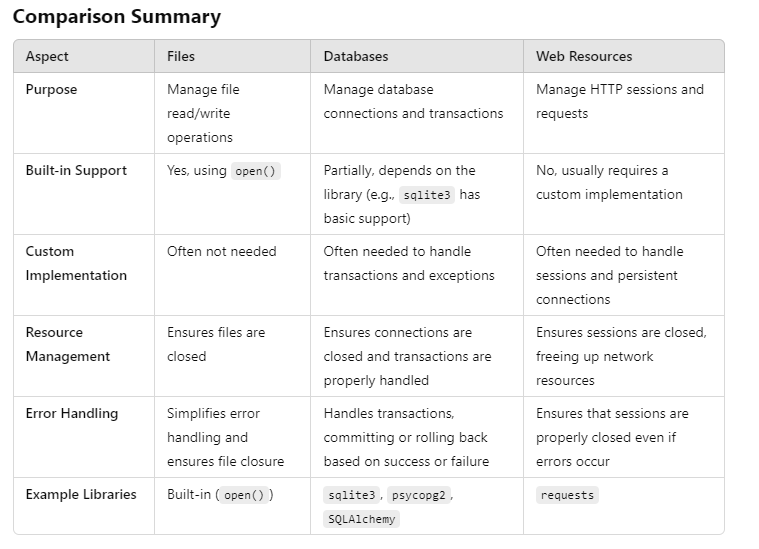

### Output

Most of our output has been sent to the console (screen), but there are many thing we can do with output from our programs.
    1. Console output
    2. Files
    3. Network Sockets
    4. Serial ports (e.g. Arduino)
    5. Printers
    6. GUI Components
    7. Remote Servers
Most of these use specialized modules to handle connections and manage resources.

This lecture prepared with the assistance of OpenAI. (2024). ChatGPT model (GPT-4) [Computer software]. https://chat.openai.com/ last accessed September 17, 2024.